In [1]:
require(data.table)


Loading required package: data.table


In [2]:
data=fread('./sei_data/MAFcommon0.01.1000g.tsv')
cnames = fread('../resources/cnames.tsv')
data$name = cnames$name[match(data$C, cnames$index)]
data$label = cnames$ID[match(data$C, cnames$index)]

Loading required package: ggplot2
Loading required package: patchwork
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”

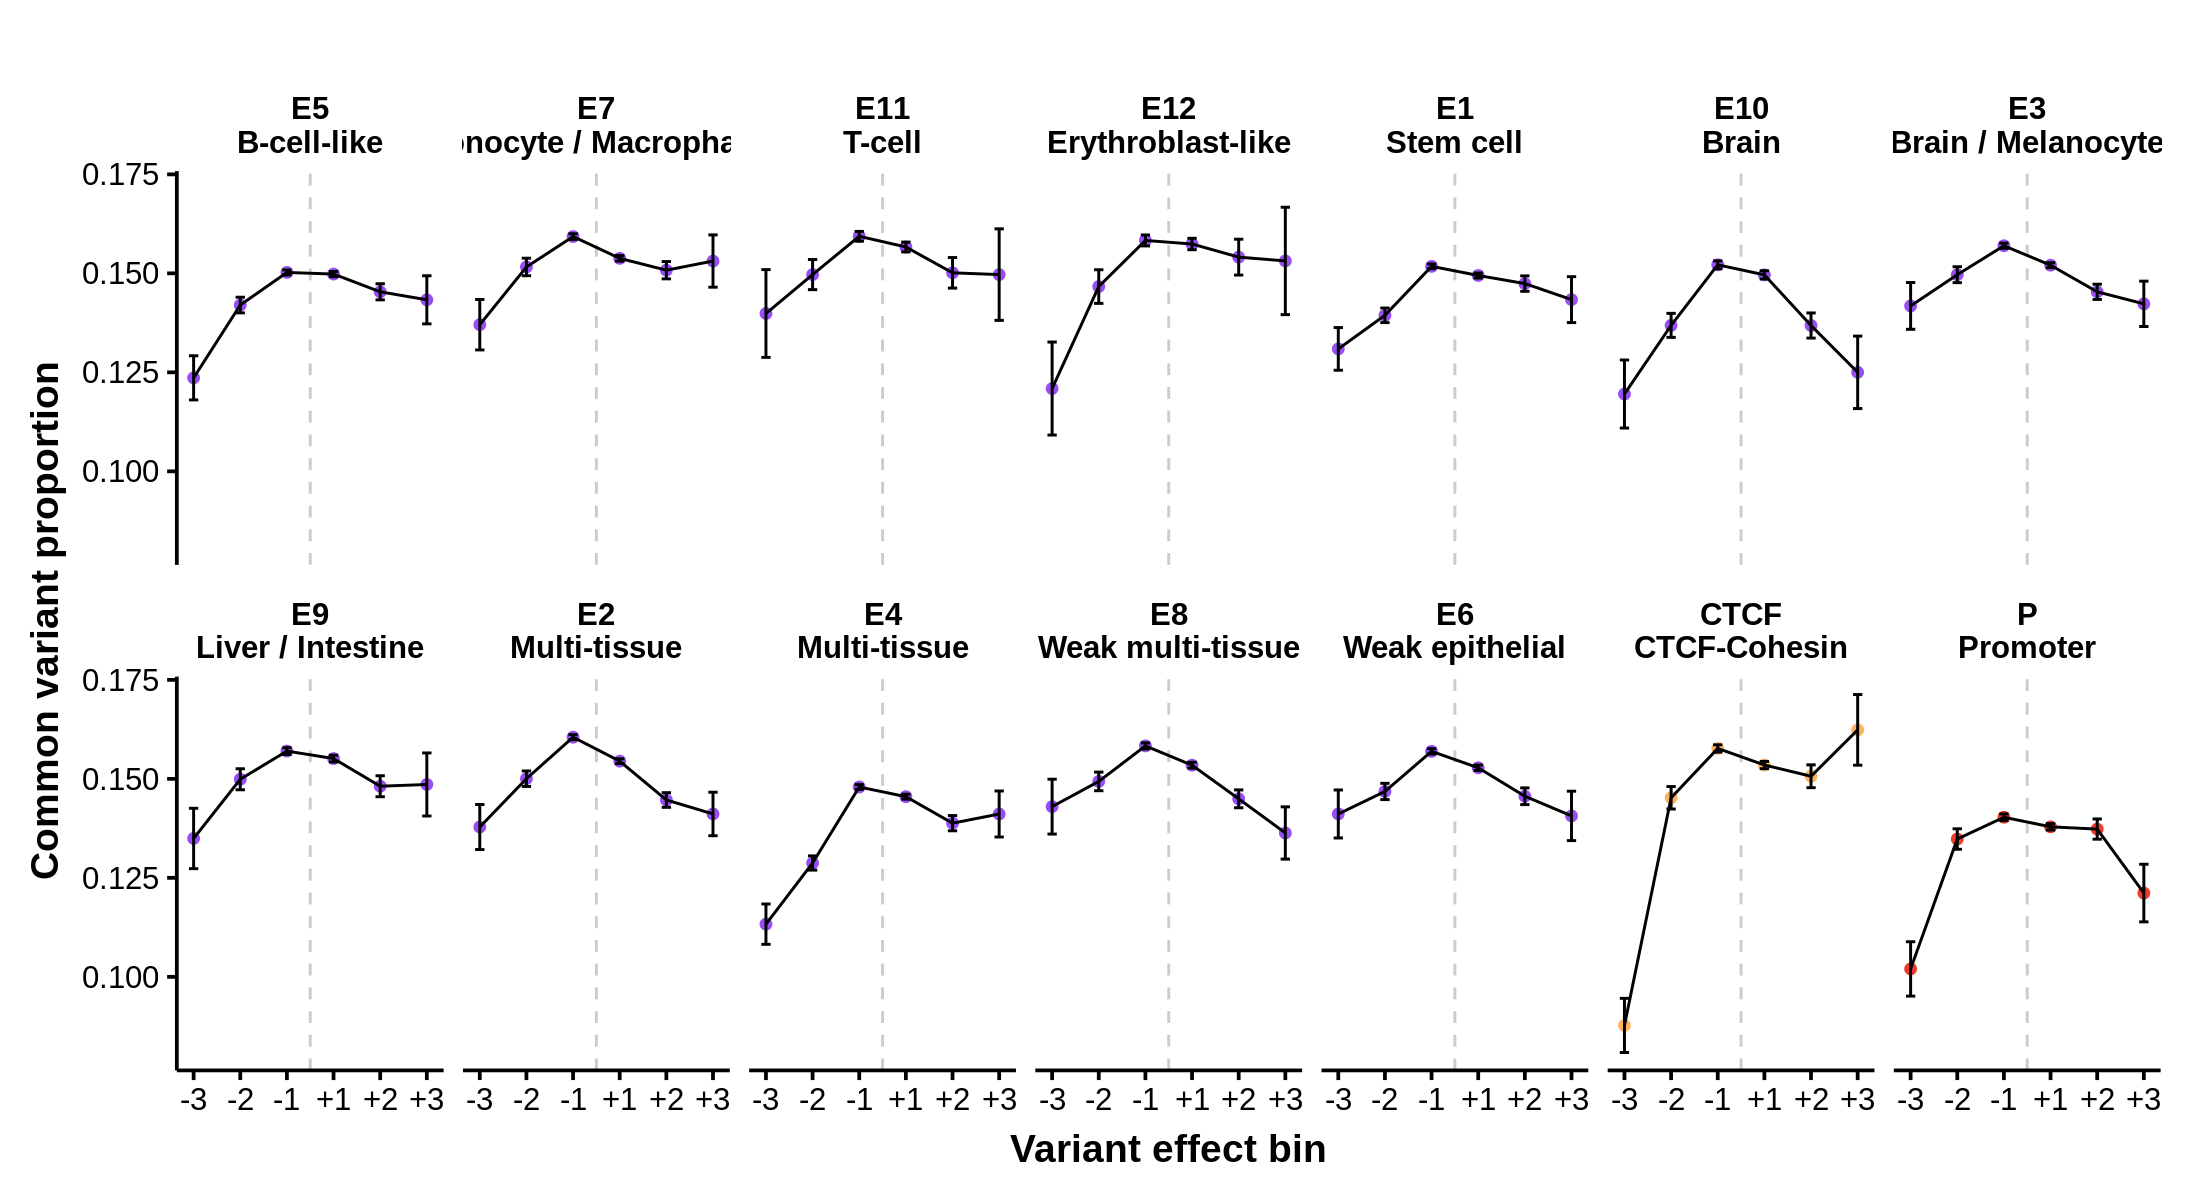

In [3]:
require(ggplot2)
require(patchwork)

options(repr.plot.width = 11, repr.plot.height = 6, repr.plot.res=200)

plotdata = data
plotdata$Group = gsub('[0-9]*','',plotdata$label)
plotdata$Group = factor(plotdata$Group, levels=c('E','P','CTCF','TF','HET','PC','TN','L'))


plotdata$label = factor(plotdata$label, levels = unique(plotdata[order(Group),label]))

#https://rpubs.com/Koundy/71792
theme_Publication <- function(base_size=14, base_family="Helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.2, "cm"),
               legend.margin = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#ffffff",fill="#ffffff"),
               strip.text = element_text(face="bold")
          ))
      
}



plotdata$group_label = factor(plotdata$group_label,levels=c('E','CTCF','P','TF','HET','PC','TN','L'))
plotdata$longlabel= paste0(plotdata$label,'\n', plotdata$name)
plotdata$longlabel=factor(plotdata$longlabel, levels =  paste0(cnames$ID,'\n', cnames$name))


p1 = ggplot(plotdata[Group %in% c('E','CTCF','P')])+geom_point(aes(x=Bin,y=mean,color=Group))+
    geom_errorbar(aes(x=Bin,ymin=mean-1.96*sem, ymax=mean+1.96*sem), width=.2)+
    geom_line(aes(x=Bin,y=mean))+facet_wrap(~longlabel,ncol = 7) + theme_minimal() + 
    geom_vline(xintercept = 2.5, linetype=2,alpha=I(0.2))+
    scale_colour_manual(values = c("#984ef3","#ef3b2c", "#fdb462"))+
    theme_Publication()+theme(legend.position = "none") + 
    scale_x_continuous('Variant effect bin',  labels =  c('-3','-2','-1','+1','+2','+3'))+
    ylab('Common variant proportion')


p1 
ggsave('./figures/common0.01.1000g.enhctcfp.pdf', width=11, height=6,dpi=200,device=cairo_pdf)

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”

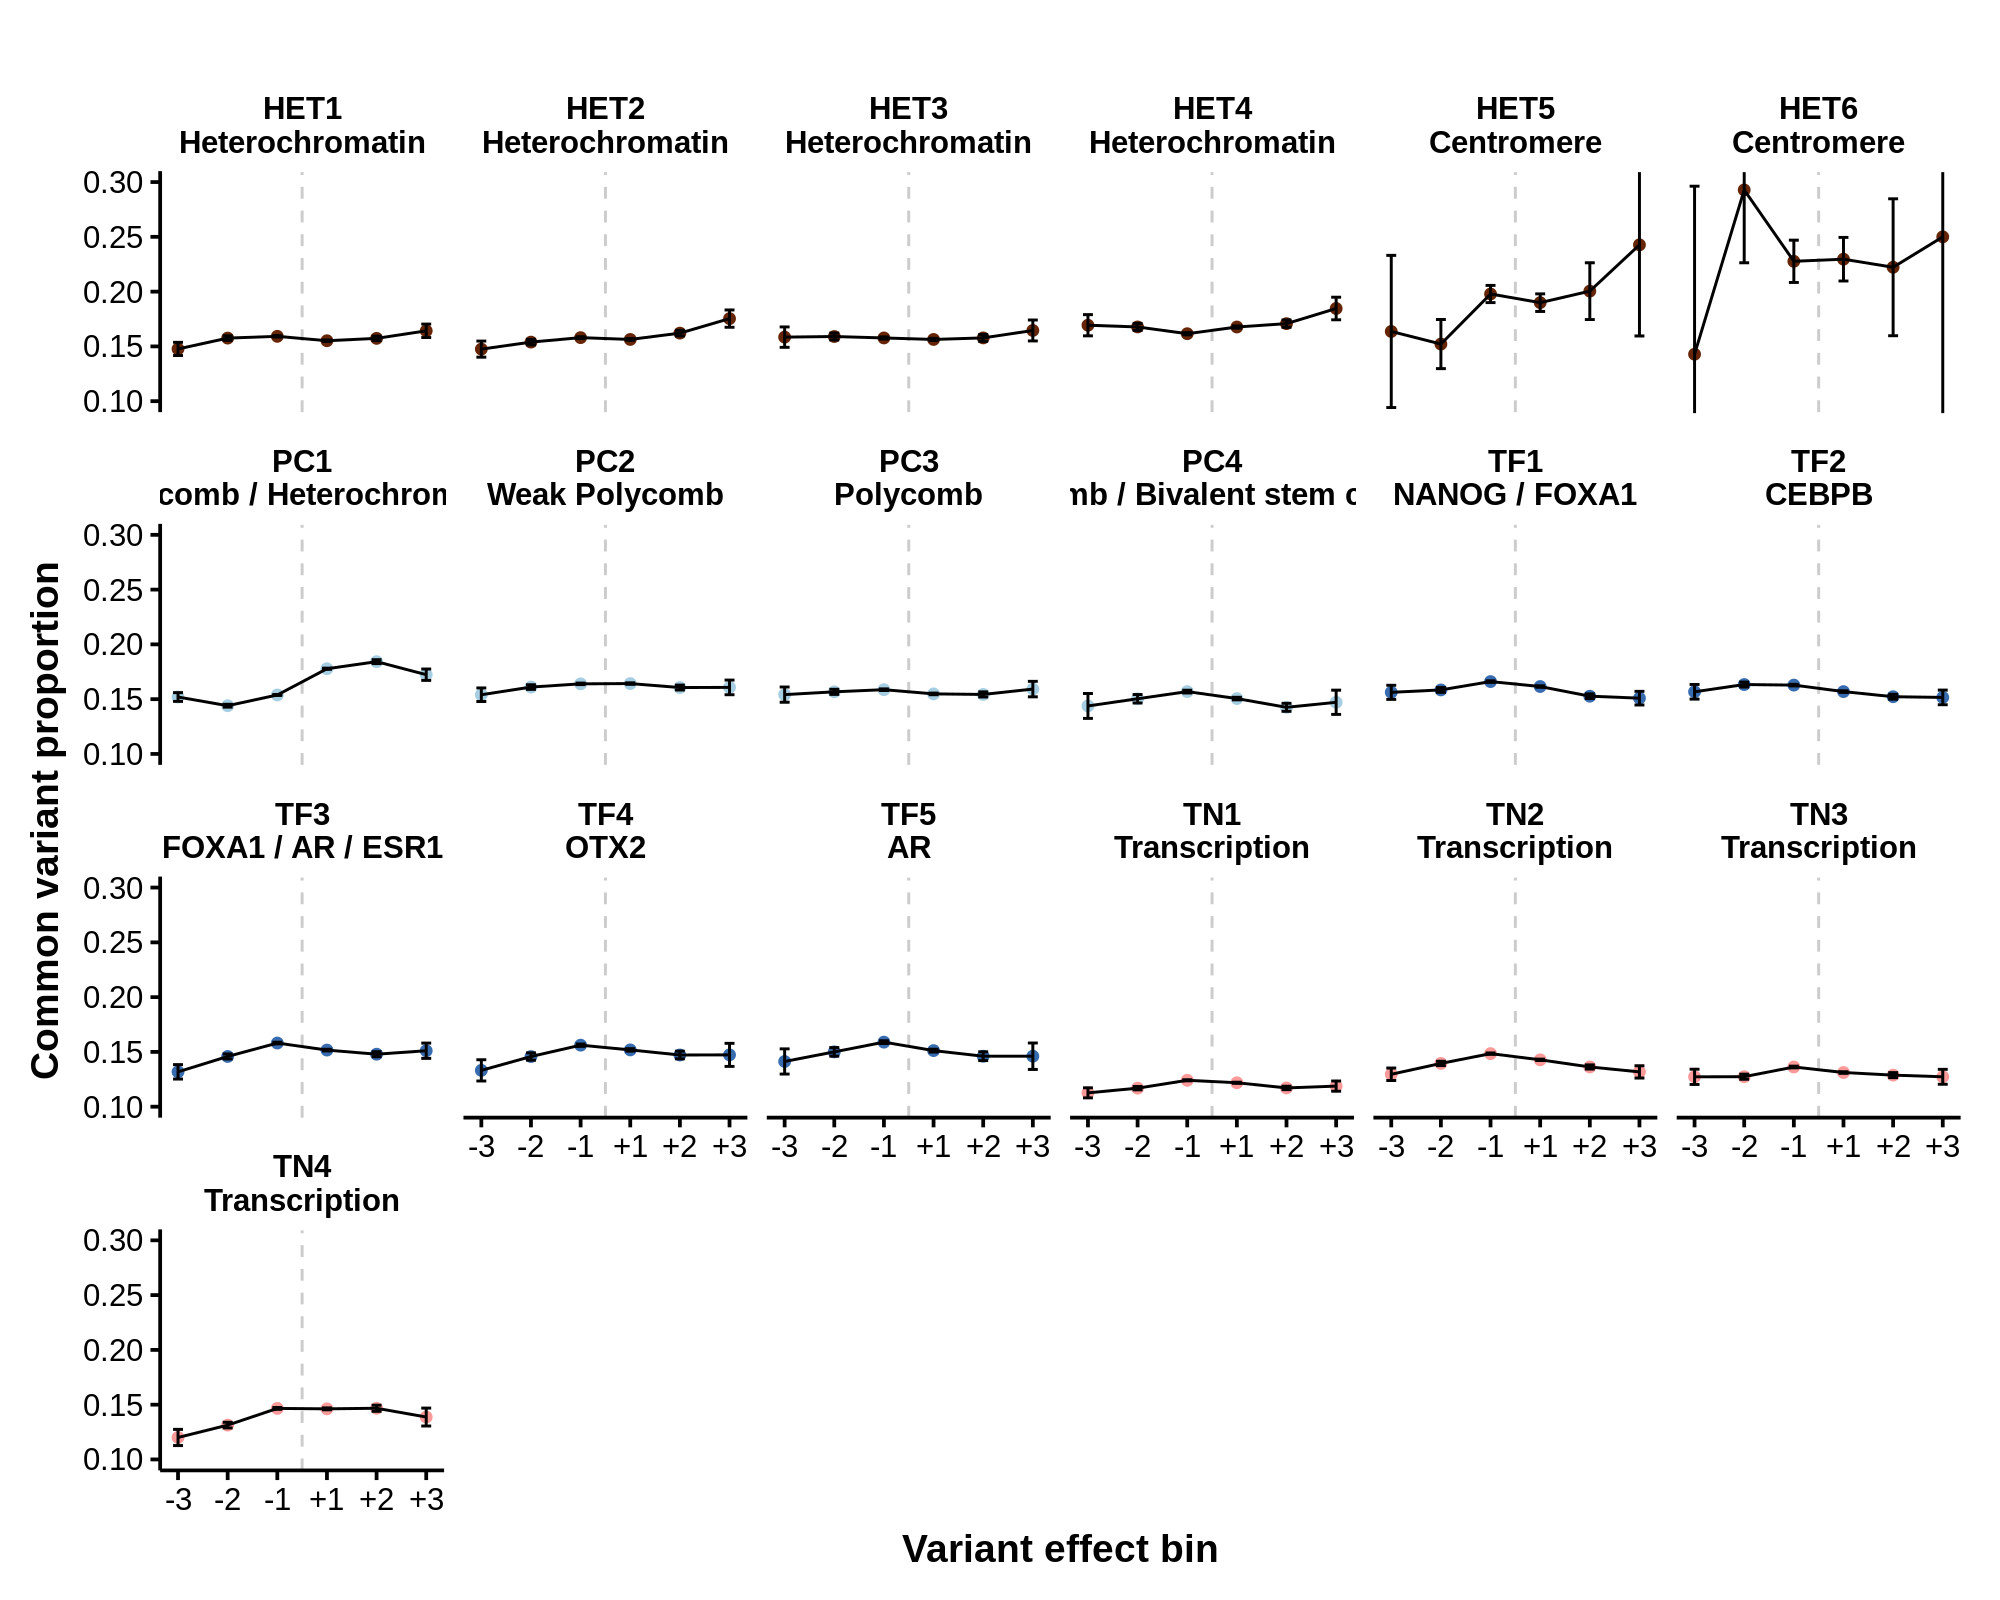

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res=200)


ggplot(plotdata[(Group %in% c('TF','HET', 'PC','TN'))])+geom_point(aes(x=Bin,y=mean,color=Group))+
    geom_errorbar(aes(x=Bin,ymin=mean-1.96*sem, ymax=mean+1.96*sem), width=.2)+
    geom_line(aes(x=Bin,y=mean))+
    facet_wrap(~paste0(label,'\n', name),ncol = 6) + theme_minimal() + 
    geom_vline(xintercept = 2.5, linetype=2,alpha=I(0.2))+
    scale_colour_manual(values = c("#386cb0","#662506","#a6cee3","#fb9a99"))+xlab('')+ylab('Allele Frequency')+
    theme_Publication()+theme(legend.position = "none")+
    scale_x_continuous('Variant effect bin',  labels =  c('-3','-2','-1','+1','+2','+3'))+
    ylab('Common variant proportion')+coord_cartesian(ylim = c(0.1,0.3))

ggsave('./figures/common0.01.1000g.tfhetpctn.pdf', width=10, height=8,dpi=200,device=cairo_pdf)

